# Importing dataset and libs

In [1]:
import pandas as pd
import numpy as np
import math
from functools import reduce

import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

replays = pd.read_csv('../data/starcraft.csv')

In [2]:
replays.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


# Cleaning

In [3]:
# deleting one row with 1 million hours of playtime
replays = replays[replays['TotalHours'] != 1000000]

replays.dropna(inplace=True)
replays.isnull().values.any()

replays.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,...,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,4719.426131,4.120467,21.651483,15.907102,661.039257,114.525764,0.004017,0.000364,0.000058,0.000094,...,0.003433,40.717594,64.218000,5.266780,0.000282,0.001031,0.000085,0.000060,0.000142,83748.656877
std,2657.307846,1.448307,4.206512,11.965468,856.348806,48.032308,0.004715,0.000210,0.000038,0.000159,...,0.000965,17.058352,19.034036,1.500796,0.000086,0.000520,0.000025,0.000112,0.000266,33612.702540
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,...,0.000679,6.666700,24.632600,2.038900,0.000091,0.000077,0.000020,0.000000,0.000000,25224.000000
25%,2423.000000,3.000000,19.000000,8.000000,300.000000,79.229400,0.001244,0.000202,0.000032,0.000000,...,0.002743,29.328700,50.929400,4.261500,0.000224,0.000682,0.000068,0.000000,0.000000,60116.000000
50%,4787.000000,4.000000,21.000000,12.000000,500.000000,107.067600,0.002444,0.000349,0.000053,0.000039,...,0.003376,37.060500,61.303300,5.086800,0.000269,0.000904,0.000082,0.000000,0.000021,81044.000000
75%,6995.000000,5.000000,24.000000,20.000000,800.000000,140.090400,0.004938,0.000493,0.000078,0.000114,...,0.004003,48.512000,74.032800,6.027500,0.000324,0.001258,0.000099,0.000087,0.000182,102156.000000
max,9271.000000,7.000000,44.000000,168.000000,25000.000000,389.831400,0.043088,0.001648,0.000338,0.003019,...,0.007971,237.142900,176.372100,18.558100,0.000832,0.005149,0.000202,0.000902,0.003084,388032.000000


## LeagueIndex spread

Text(0,0.5,'Amount of replays')

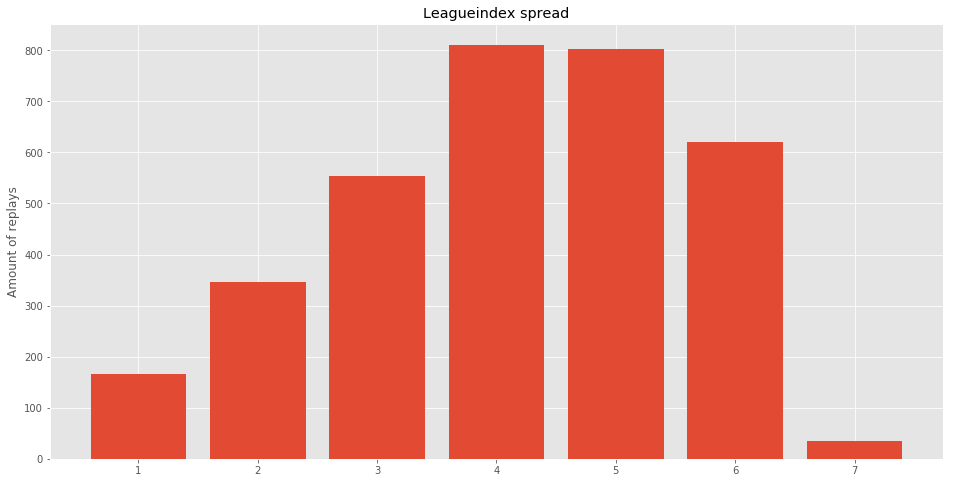

In [4]:
plt.figure(figsize=(16, 8));

leagueCounts = replays['LeagueIndex'].value_counts().sort_index()

labels = leagueCounts.index.values.tolist()
y_pos = np.arange(len(labels))

# print(leagueCounts)
# print(replays.groupby('LeagueIndex').count())

plt.bar(y_pos, leagueCounts, align='center', alpha=1)
plt.xticks(y_pos, labels)

plt.title('Leagueindex spread')
plt.ylabel('Amount of replays')


## Combining LeagueIndexes

Text(0,0.5,'Amount of replays')

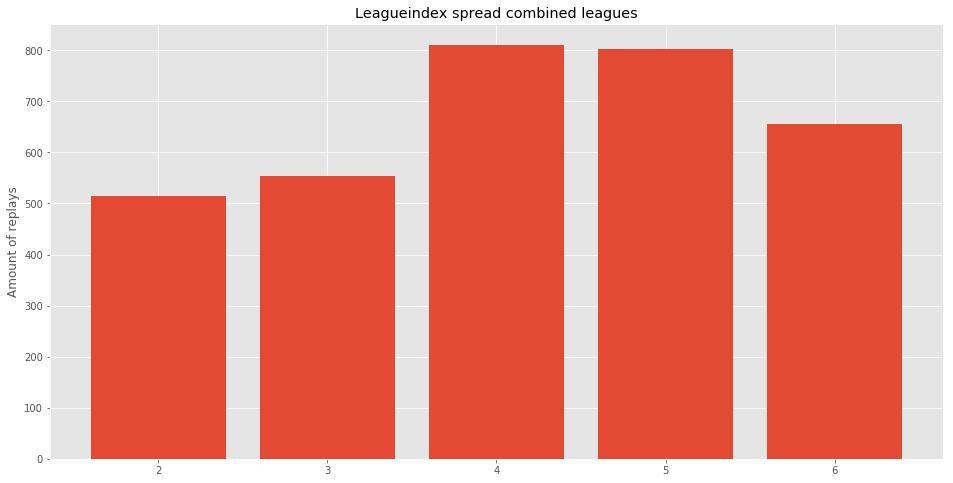

In [5]:
replays.loc[replays['LeagueIndex'] == 1, 'LeagueIndex'] = 2
replays.loc[replays['LeagueIndex'] == 7, 'LeagueIndex'] = 6

leagueCounts = replays['LeagueIndex'].value_counts().sort_index()
labels = leagueCounts.index.values.tolist()
y_pos = np.arange(len(labels))

plt.figure(figsize=(16, 8));
plt.bar(y_pos, leagueCounts, align='center', alpha=1)
plt.xticks(y_pos, labels)
plt.title('Leagueindex spread combined leagues')
plt.ylabel('Amount of replays')

# Plotting LeagueIndex against other features

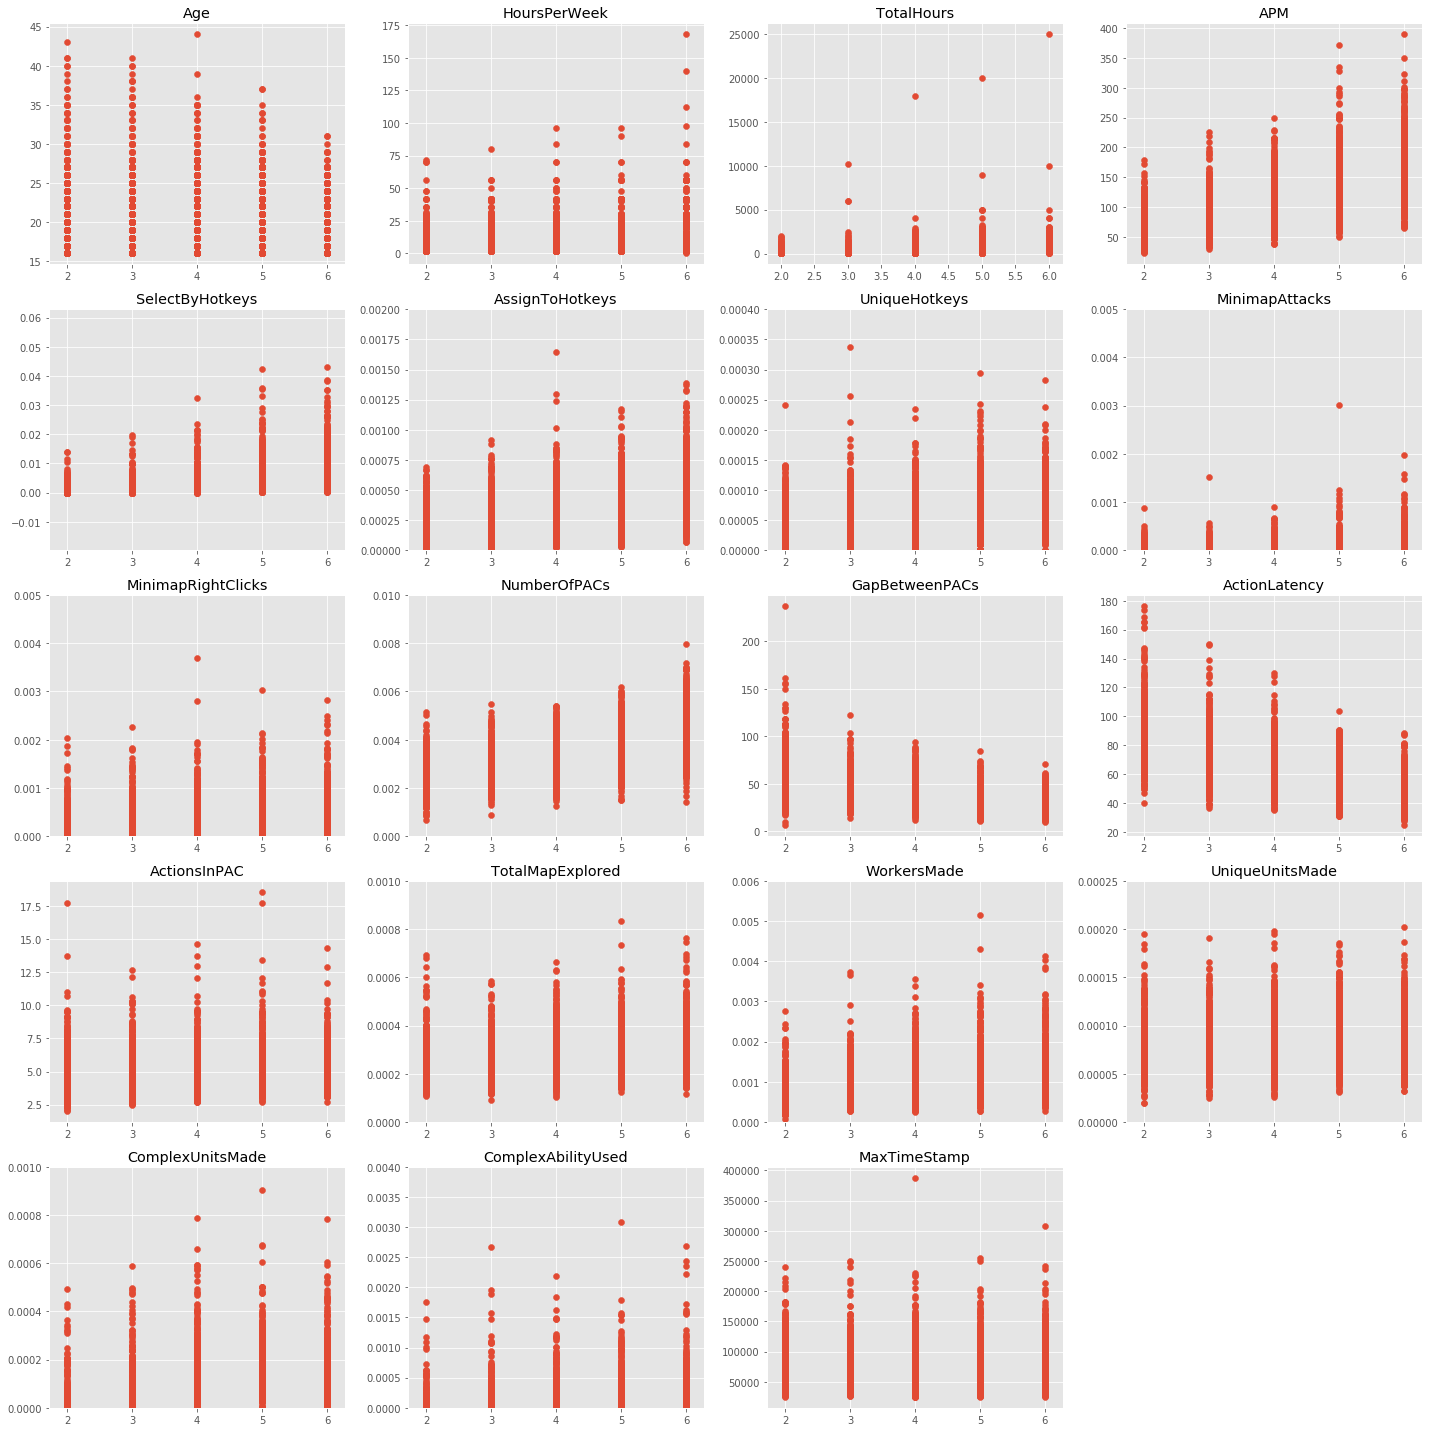

In [6]:
plt.figure(figsize=(20, 20));

plt.subplot(5, 4, 1)
plt.title('Age')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.Age)

plt.subplot(5, 4, 2)
plt.title('HoursPerWeek')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.HoursPerWeek)

plt.subplot(5, 4, 3)
plt.title('TotalHours')
plt.scatter(replays.LeagueIndex, replays.TotalHours)

plt.subplot(5, 4, 4)
plt.title('APM')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.APM)

plt.subplot(5, 4, 5)
plt.title('SelectByHotkeys')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.SelectByHotkeys)

plt.subplot(5, 4, 6)
plt.title('AssignToHotkeys')
plt.ylim([0.0,0.002])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.AssignToHotkeys)

plt.subplot(5, 4, 7)
plt.title('UniqueHotkeys')
plt.ylim([0.0,0.0004])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.UniqueHotkeys)

plt.subplot(5, 4, 8)
plt.title('MinimapAttacks')
plt.ylim([0.0,0.005])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.MinimapAttacks)

plt.subplot(5, 4, 9)
plt.title('MinimapRightClicks')
plt.ylim([0.0,0.005])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.MinimapRightClicks)

plt.subplot(5, 4, 10)
plt.title('NumberOfPACs')
plt.ylim([0.0,0.010])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.NumberOfPACs)

plt.subplot(5, 4, 11)
plt.title('GapBetweenPACs')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.GapBetweenPACs)

plt.subplot(5, 4, 12)
plt.title('ActionLatency')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.ActionLatency)

plt.subplot(5, 4, 13)
plt.title('ActionsInPAC')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.ActionsInPAC)

plt.subplot(5, 4, 14)
plt.title('TotalMapExplored')
plt.ylim([0.0,0.001])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.TotalMapExplored)

plt.subplot(5, 4, 15)
plt.title('WorkersMade')
plt.ylim([0.0,0.006])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.WorkersMade)

plt.subplot(5, 4, 16)
plt.title('UniqueUnitsMade')
plt.ylim([0.0,0.00025])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.UniqueUnitsMade)

plt.subplot(5, 4, 17)
plt.title('ComplexUnitsMade')
plt.ylim([0.0,0.001])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.ComplexUnitsMade)

plt.subplot(5, 4, 18)
plt.title('ComplexAbilityUsed')
plt.ylim([0.0,0.004])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.ComplexAbilityUsed)

plt.subplot(5, 4, 19)
plt.title('MaxTimeStamp')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.MaxTimeStamp)

plt.tight_layout()

# Predicting league index

## Splitting into train and test

In [45]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(replays.iloc[:, 2:].values, replays.iloc[:, 1].values, test_size=test_size)

### Normalize/standardize

In [46]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Feature selection

In [47]:
reg = LinearRegression()
reg.fit(X_train, y_train)

pred = reg.predict(X_test)
r_square = reg.score(X_test, y_test)
print(r_square)

0.5217034126006876


## Linear Support Vector Machines

In [48]:
clf = SVC(random_state=0, tol=1e-5, kernel='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc = accuracy_score(pred, y_test)
print(acc)

0.468562874251497


## KFold Cross Validation

In [ ]:
X = np.array(list(zip(replays.Age.values, replays.HoursPerWeek.values, replays.Age.values, replays.TotalHours.values, replays.SelectByHotkeys.values, replays.AssignToHotkeys.values, 
                      replays.UniqueHotkeys.values, replays.MinimapAttacks.values, replays.MinimapRightClicks.values, replays.NumberOfPACs.values, replays.GapBetweenPACs.values, 
                      replays.ActionLatency.values, replays.ActionsInPAC.values, replays.TotalMapExplored.values, replays.WorkersMade.values, replays.UniqueUnitsMade.values,
                      replays.ComplexUnitsMade.values, replays.ComplexAbilityUsed.values, replays.MaxTimeStamp.values, replays.APM.values)))
y = np.array(list(replays.LeagueIndex.values))

kf = KFold(n_splits=2, shuffle=True)

kf.get_n_splits(X)

accuracy_scores = []
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    #Create train and test set
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Standardize data
    scaler = preprocessing.StandardScaler().fit(X_train)
    f_train = scaler.transform(X_train)
    f_test = scaler.transform(X_test)
    
    #Create model
    clf = SVC(random_state=0, tol=1e-5, kernel='linear')
    clf.fit(f_train, y_train)
    pred = clf.predict(f_test)
    
    #Check accuracy
    acc = accuracy_score(pred, y_test)
    accuracy_scores.append(acc)
    
print(accuracy_scores) 
print(reduce(lambda x, y: x + y, accuracy_scores) / len(accuracy_scores))

## KNeighborsClassifier

In [ ]:
results = []
labels = []
for i in range(20, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(f_train, labels_train)
    results.append(knn.score(f_test, labels_test))
    labels.append(i)
y_pos = np.arange(len(labels))
plt.figure(figsize=(16, 8));
plt.bar(y_pos, results, align='center', alpha=1)
plt.xticks(y_pos, labels)    